# Import the libraries

In [1]:
import os
import zipfile
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
!pip install contractions
import contractions
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import display, HTML
import warnings
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import nltk
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
nltk.download('wordnet')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.9 MB/s eta 0:00:00
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2024-05-25 22:20:32.454409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 22:20:32.454515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 22:20:32.726228: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Prepare The Notbook

In [2]:
np.random.seed(500)

In [3]:
# Ignore warnings
warnings.filterwarnings('ignore')

#Import the data

In [4]:
os.environ['KAGGLE_USERNAME'] = "germeengehad"
os.environ['KAGGLE_KEY'] = "5f74e91f4236f3c4a3b265fe7c4c3a4a"

In [5]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0%|                                               | 0.00/1.99M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.99M/1.99M [00:00<00:00, 146MB/s]


In [6]:
#extract the zip fill of data
zip_ref = zipfile.ZipFile('/kaggle/working/twitter-entity-sentiment-analysis.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Load Data

In [7]:
# Load the dataset
training = pd.read_csv("/content/twitter_training.csv", encoding='latin-1', header=None)
validation = pd.read_csv("/content/twitter_validation.csv", encoding='latin-1', header=None)

In [8]:
# concatenate data
df = pd.concat([training, validation], ignore_index=False)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
df.columns=['id','information','labels','text']
df.head()

,id,information,labels,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           75682 non-null  int64 
 1   information  75682 non-null  object
 2   labels       75682 non-null  object
 3   text         74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


# EDA And Data preprossing

## Check Missing Values

In [11]:
# check missing values
print(df.isnull().sum())

id               0
information      0
labels           0
text           686
dtype: int64


In [12]:
# remove missing values
df.dropna(inplace=True)
# check missing values
df.isnull().sum()

id             0
information    0
labels         0
text           0
dtype: int64

## Check Duplicate Values

In [13]:
# check duplicate values
df.duplicated().sum()

2857

In [14]:
# remove duplicate values
remove_duplicates = df.drop_duplicates()
df = remove_duplicates
# check duplicate values
df.duplicated().sum()

0

## Visualization

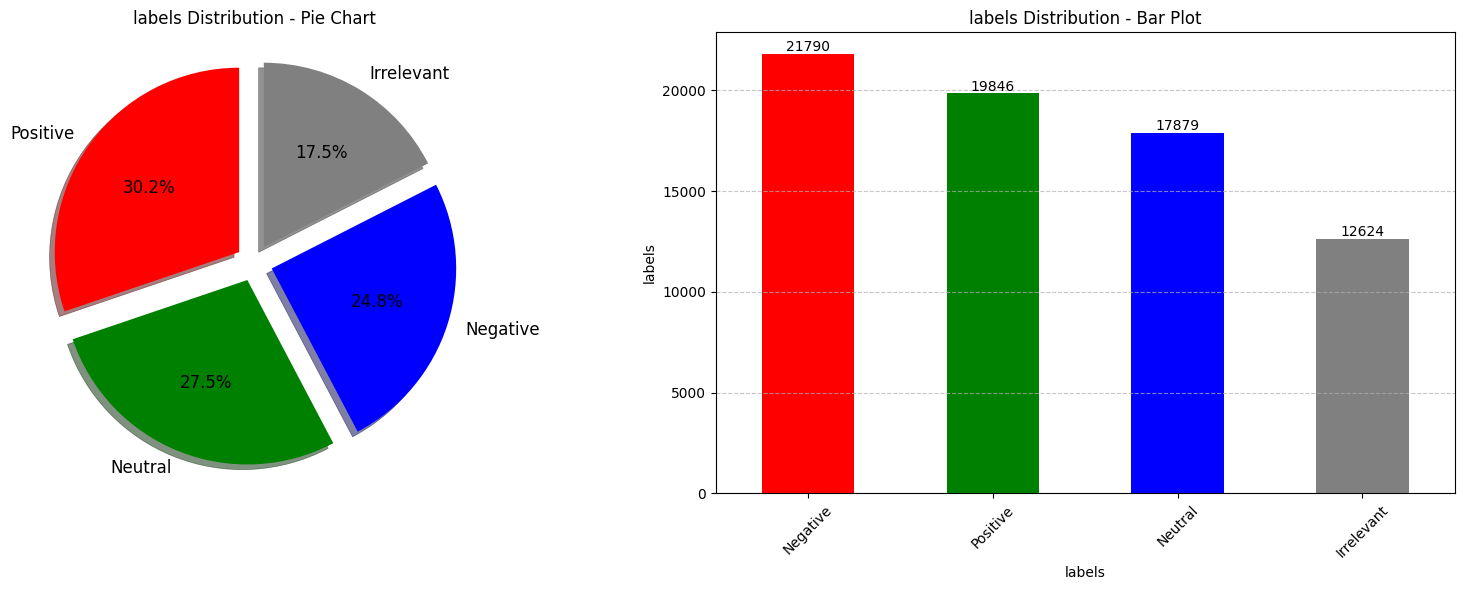

In [15]:
# Define custom colors
colors = ['red', 'green', 'blue', 'gray']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting pie chart for text distribution with custom colors
axs[0].pie(df['labels'].value_counts(), labels=df['labels'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('labels Distribution - Pie Chart')

# Plotting bar plot for text distribution
axs[1] = df['labels'].value_counts().plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('labels Distribution - Bar Plot')
axs[1].set_xlabel('labels')
axs[1].set_ylabel('labels')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add text on top of each bar in the bar plot
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


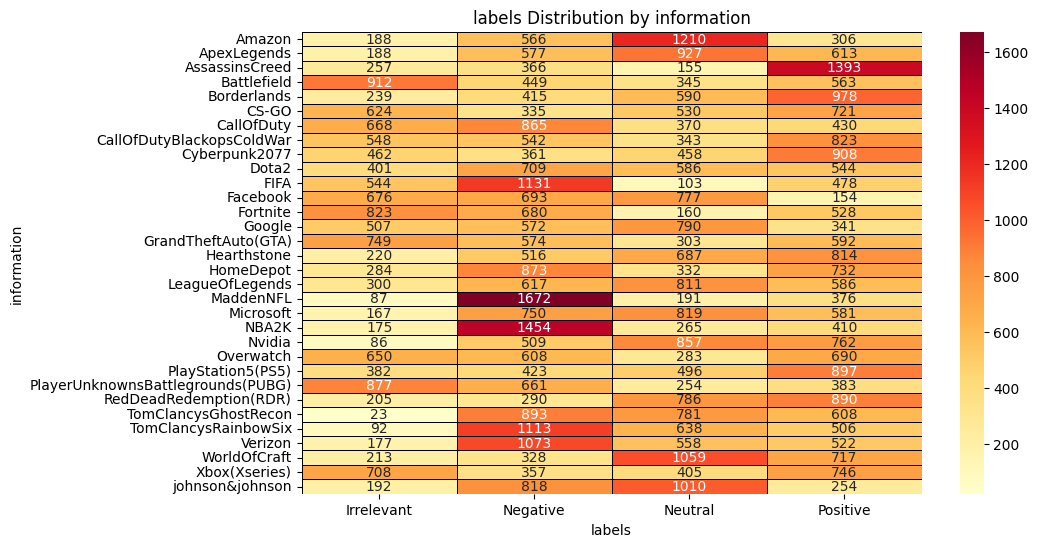

In [16]:
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['information'], columns=df['labels'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('labels Distribution by information')
plt.xlabel('labels')
plt.ylabel('information')
plt.show()

In [17]:
# Display minimum and maximum values for each labels for each information
for labels in count_table.columns:
    min_branch = count_table[labels].idxmin()
    max_branch = count_table[labels].idxmax()
    min_val = count_table[labels].min()
    max_val = count_table[labels].max()
    print(f"Sentiment '{labels}':")
    print(f"  Minimum value '{min_val}' at Branch '{min_branch}'")
    print(f"  Maximum value '{max_val}' at Branch '{max_branch}'\n")

Sentiment 'Irrelevant':
  Minimum value '23' at Branch 'TomClancysGhostRecon'
  Maximum value '912' at Branch 'Battlefield'

Sentiment 'Negative':
  Minimum value '290' at Branch 'RedDeadRedemption(RDR)'
  Maximum value '1672' at Branch 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '103' at Branch 'FIFA'
  Maximum value '1210' at Branch 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Branch 'Facebook'
  Maximum value '1393' at Branch 'AssassinsCreed'



In [18]:
#remove unessery coulmns
df.drop(columns=["id","information"],inplace=True)

In [19]:
df.head()

,labels,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [20]:
# Use value_counts() to get counts of unique values in the 'labels' column
label_counts = df['labels'].value_counts()

# Print unique values and their counts
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: Negative, Count: 21790
Label: Positive, Count: 19846
Label: Neutral, Count: 17879
Label: Irrelevant, Count: 12624


## text preprossing

In [21]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    text = np.array(Words)[np.sort(indices)].tolist()

    return text


In [22]:
#spliting the data to x and y
x=df.drop('labels',axis=1)
y=df.labels

In [23]:
#list the text
texts=list(x['text'])

In [24]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('wordnet', download_dir='/usr/local/share/nltk_data')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...


True

In [25]:
import os
import nltk

# Set the NLTK_DATA environment variable
os.environ["NLTK_DATA"] = "/usr/local/share/nltk_data"  # Replace this with the appropriate directory

# Try downloading the WordNet corpus again
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/c

In [27]:
#applying the preprocssing
text = [process_text(text) for text in texts]

In [28]:
print(text[:10])

[['getting', 'borderland', 'murder'], ['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg']]


In [79]:
#spliting the data to x_train and y_train
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.1, random_state=42)

## Text_Embading

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

the size of vocab = 24749


In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [82]:
y.value_counts()

labels
Negative      21790
Positive      19846
Neutral       17879
Irrelevant    12624
Name: count, dtype: int64

#Build The Models

### RNN Model

In [83]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=100
inputt=Input(shape=(maxlen,))

In [56]:
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization

learning_rate = 0.0001
# l2_lambda = 0.01
# Define the model architecture
x = Embedding(input_dim=v+1, output_dim=D)(inputt)
x = Dropout(0.7)(x)
x = Bidirectional(SimpleRNN(150))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)   # Output layer

# Create the model
model = Model(inputt, x)

# Define the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [85]:
import tensorflow as tf
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [59]:

# Train the model with early stopping
history = model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))
# ,callbacks=[early_stopping]

Epoch 1/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.3118 - loss: 1.3604 - val_accuracy: 0.4380 - val_loss: 1.2435
Epoch 2/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 75s 18ms/step - accuracy: 0.4863 - loss: 1.1837 - val_accuracy: 0.6173 - val_loss: 0.9615
Epoch 3/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.6217 - loss: 0.9371 - val_accuracy: 0.7083 - val_loss: 0.7727
Epoch 4/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7023 - loss: 0.7623 - val_accuracy: 0.7573 - val_loss: 0.6544
Epoch 5/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7538 - loss: 0.6386 - val_accuracy: 0.7820 - val_loss: 0.5799
Epoch 6/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7888 - loss: 0.5579 - val_accuracy: 0.8149 - val_loss: 0.4995
Epoch 7/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.8130 - loss: 0.4903 - val_accuracy: 0.8266 - val_loss: 0.4569
Epoch 8/15
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8249 -

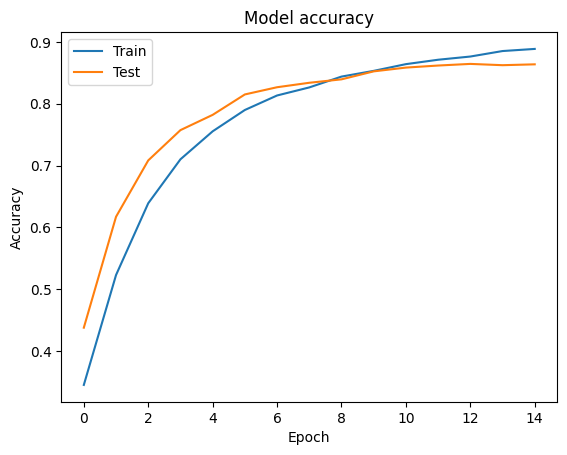

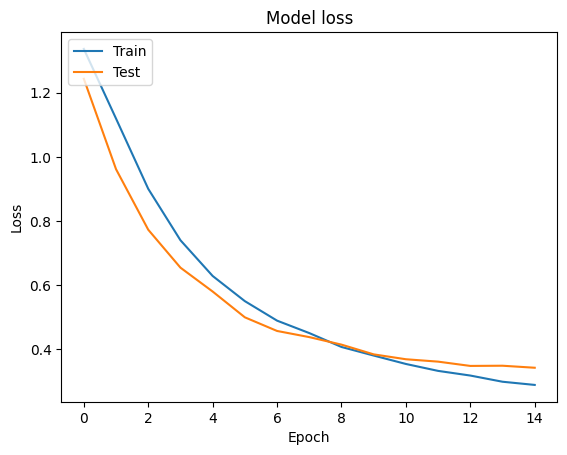

In [61]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [86]:
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras import backend as K


# Custom callback to compute F1 score
class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_predict = np.asarray(self.model.predict(self.validation_data[0]))
        val_predict = np.argmax(val_predict, axis=1)
        val_targ = np.argmax(self.validation_data[1], axis=1)
        _val_f1 = f1_score(val_targ, val_predict, average='weighted')
        print(f" — val_f1: {_val_f1}")


In [87]:
learning_rate = 0.0001

# Define the model architecture
x = Embedding(input_dim=v+1, output_dim=D)(inputt)
x = Dropout(0.7)(x)
x = Bidirectional(SimpleRNN(150))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)   # Output layer

# Create the model
model = Model(inputt, x)

# Define the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)


In [88]:
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
# Assuming you have your data split into X_train, y_train, X_val, y_val
f1_score_callback = F1ScoreCallback(validation_data=(X_test,y_test_one_hot))

# Train the model with the F1ScoreCallback
history=model.fit(X_train,  y_train_one_hot, epochs=13, validation_data=(X_test,y_test_one_hot), callbacks=f1_score_callback)



Epoch 1/13
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
 — val_f1: 0.458799575006061
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - accuracy: 0.3116 - loss: 1.3633 - val_accuracy: 0.5097 - val_loss: 1.1901
Epoch 2/13
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step e
 — val_f1: 0.6093472841093975
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.5185 - loss: 1.1291 - val_accuracy: 0.6248 - val_loss: 0.9430
Epoch 3/13
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step e
 — val_f1: 0.7023886103014748
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.6326 - loss: 0.9093 - val_accuracy: 0.7032 - val_loss: 0.7791
Epoch 4/13
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step e
 — val_f1: 0.7397988395807971
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7063 - loss: 0.7490 - val_accuracy: 0.7448 - val_loss: 0.6603
Epoch 5/13
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step e
 — val_f1: 0.782342817303251
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7530 - loss: 0.6383 - val_accuracy: 0.784

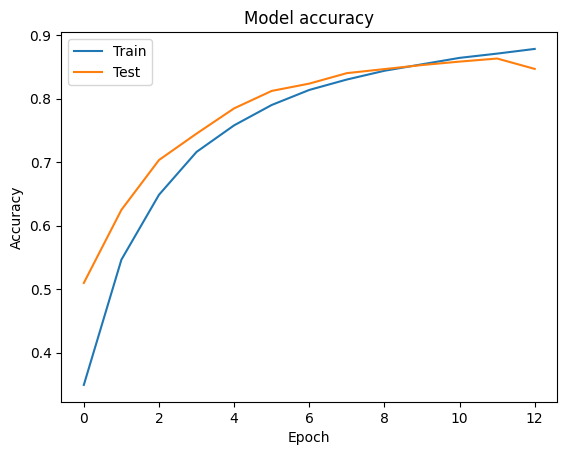

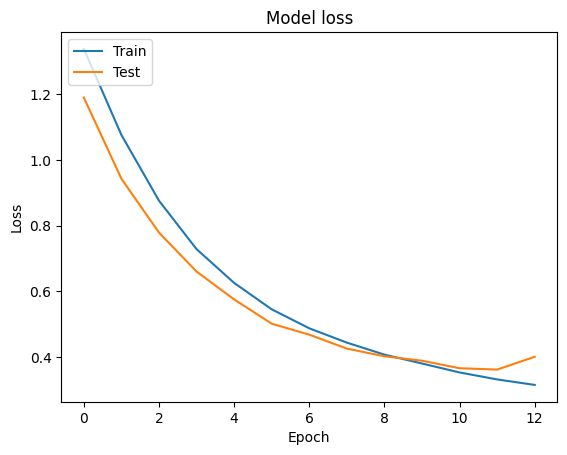

In [91]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### LSTM Model

In [76]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt)
x = Dropout(0.7)(x)
x = Bidirectional(LSTM(150))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [79]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
# Train the model with early stopping
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot))

Epoch 1/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.3401 - loss: 1.3389 - val_accuracy: 0.5505 - val_loss: 1.0700
Epoch 2/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.5687 - loss: 1.0360 - val_accuracy: 0.6490 - val_loss: 0.8900
Epoch 3/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.6560 - loss: 0.8668 - val_accuracy: 0.6945 - val_loss: 0.7749
Epoch 4/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.6954 - loss: 0.7833 - val_accuracy: 0.7316 - val_loss: 0.6954
Epoch 5/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7476 - loss: 0.6620 - val_accuracy: 0.7614 - val_loss: 0.6231
Epoch 6/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7724 - loss: 0.5974 - val_accuracy: 0.7886 - val_loss: 0.5691
Epoch 7/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7923 - loss: 0.5407 - val_accuracy: 0.7899 - val_loss: 0.5464
Epoch 8/20
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8084 -

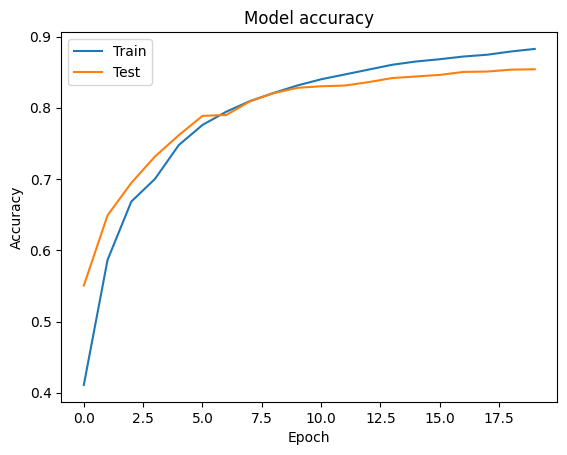

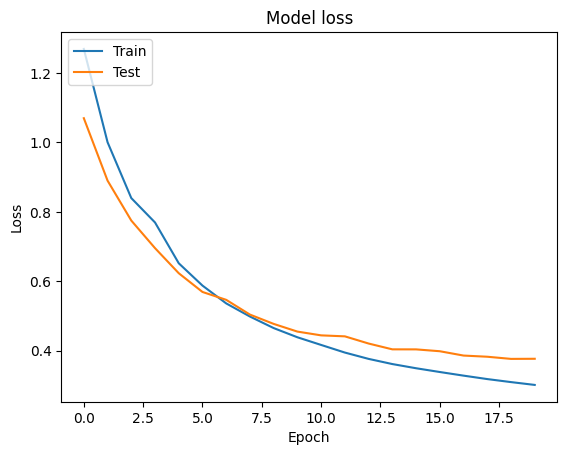

In [81]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### TfidfVectorizer

In [59]:
#Vectorize Data
def vectorize_data(text):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text)
    return tfidf_vectors, tfidf_vectorizer

### SVM Model

In [58]:
#spliting the data to x_train and y_train
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [62]:
# Convert list of lists to list of strings
X_train = [' '.join(doc) for doc in X_train]
X_test = [' '.join(doc) for doc in X_test]

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train SVM classifier
SVM_classifier =SVC(random_state=42)
SVM_classifier.fit(X_train_tfidf, y_train)


# Predict on the testing data
y_pred = SVM_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Predict on the testing data
y_pred_train = SVM_classifier.predict(X_train_tfidf)
accuracy = accuracy_score(y_train, y_pred_train)
print("train  Accuracy:", accuracy)

Test Accuracy: 0.9078874410867757
train  Accuracy: 0.9596090866559235


### Naive Base Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
# Convert list of lists to list of strings
X_train = [' '.join(doc) for doc in X_train]
X_test = [' '.join(doc) for doc in X_test]

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes classifier
NB_classifier = naive_bayes.MultinomialNB()
NB_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = NB_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Predict on the testing data
y_pred_train = NB_classifier.predict(X_train_tfidf)
accuracy = accuracy_score(y_train, y_pred_train)
print("train  Accuracy:", accuracy)

Test Accuracy: 0.7256723038536179

train  Accuracy: 0.7774774306458041
